# Imports and Loading Dataset

In [1]:
# !pip3 install streamlit==1.54.0 scikit-learn==1.7.2 numpy==2.2.6 scipy==1.15.3 pandas==2.3.3 matplotlib==3.10.7 seaborn==0.13.2 xgboost==3.2.0 -q

In [2]:
# !pip install numpy --force-reinstall

In [3]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score
)
import warnings
warnings.filterwarnings('ignore')

# Load the Breast Cancer Wisconsin (Diagnostic) Dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Creating a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nTarget Distribution:")
print(df['target'].value_counts())
print("\nTarget Names:")
print(f"0 = {target_names[0]}, 1 = {target_names[1]}")
print("\nDataset Info:")
display(df.info())

Dataset Shape: (569, 31)

First few rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Target Distribution:
target
1    357
0    212
Name: count, dtype: int64

Target Names:
0 = malignant, 1 = benign

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perim

None

## Data Exploration
Exploring the dataset to understand feature distributions, correlations, and data quality.

In [4]:
# Check for missing values
print("Missing Values in any fields:", df.isnull().sum().sum())

# Statistical Summary
print("Statistical summary of the dataset:")
display(df.describe().round(2).T)

Missing Values in any fields: 0
Statistical summary of the dataset:


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


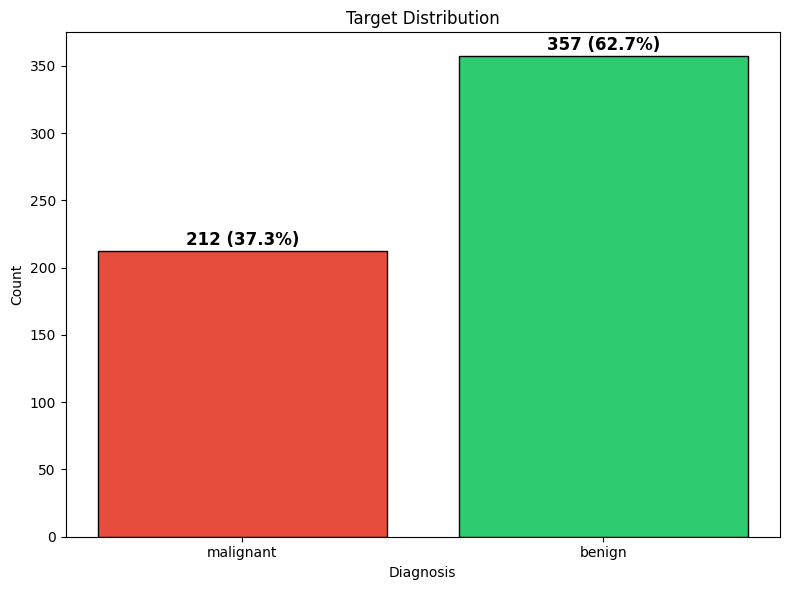

In [5]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))

target_counts = df['target'].value_counts()
colors = ['#e74c3c', '#2ecc71']
bars = plt.bar([target_names[0], target_names[1]], [target_counts[0], target_counts[1]], color=colors, edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Target Distribution')

# Add count with percentage labels on bars
for i, (label, count) in enumerate(zip([target_names[0], target_names[1]], [target_counts[0], target_counts[1]])):
    percentage = count / len(df) * 100
    plt.text(i, count + 5, f'{count} ({percentage:.1f}%)', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

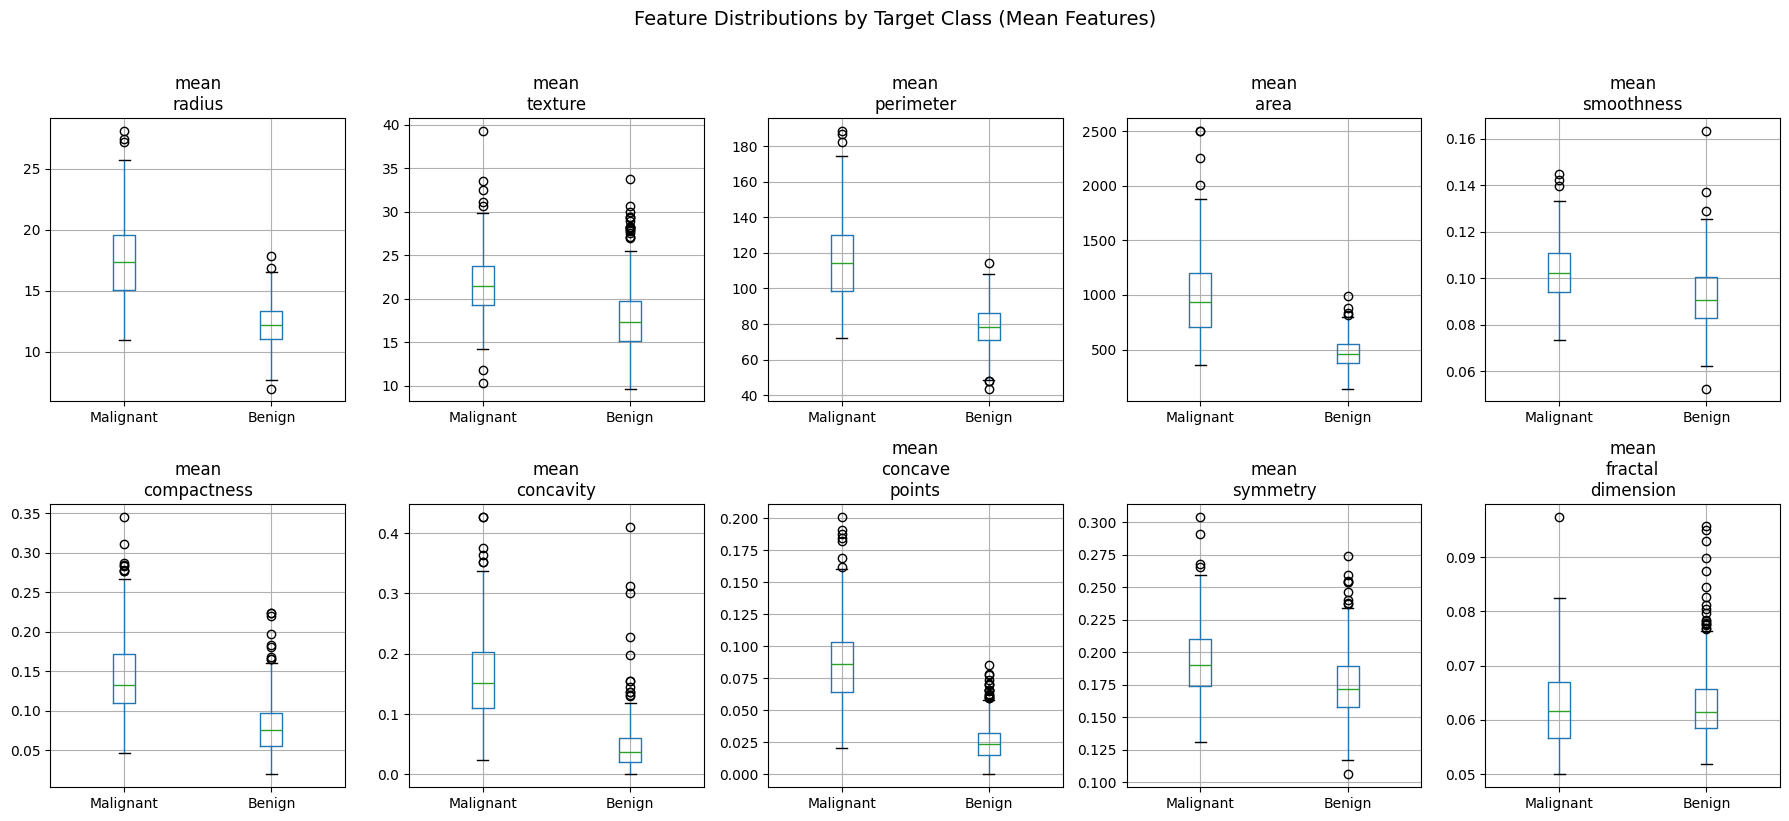

In [6]:
# Feature Distribution - Box plots for key features (mean values)
mean_features = [col for col in feature_names if 'mean' in col]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for idx, feature in enumerate(mean_features):
    df.boxplot(column=feature, by='target', ax=axes[idx])
    axes[idx].set_title(feature.replace(' ', '\n'))
    axes[idx].set_xlabel('')
    axes[idx].set_xticklabels(['Malignant', 'Benign'])

plt.suptitle('Feature Distributions by Target Class (Mean Features)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

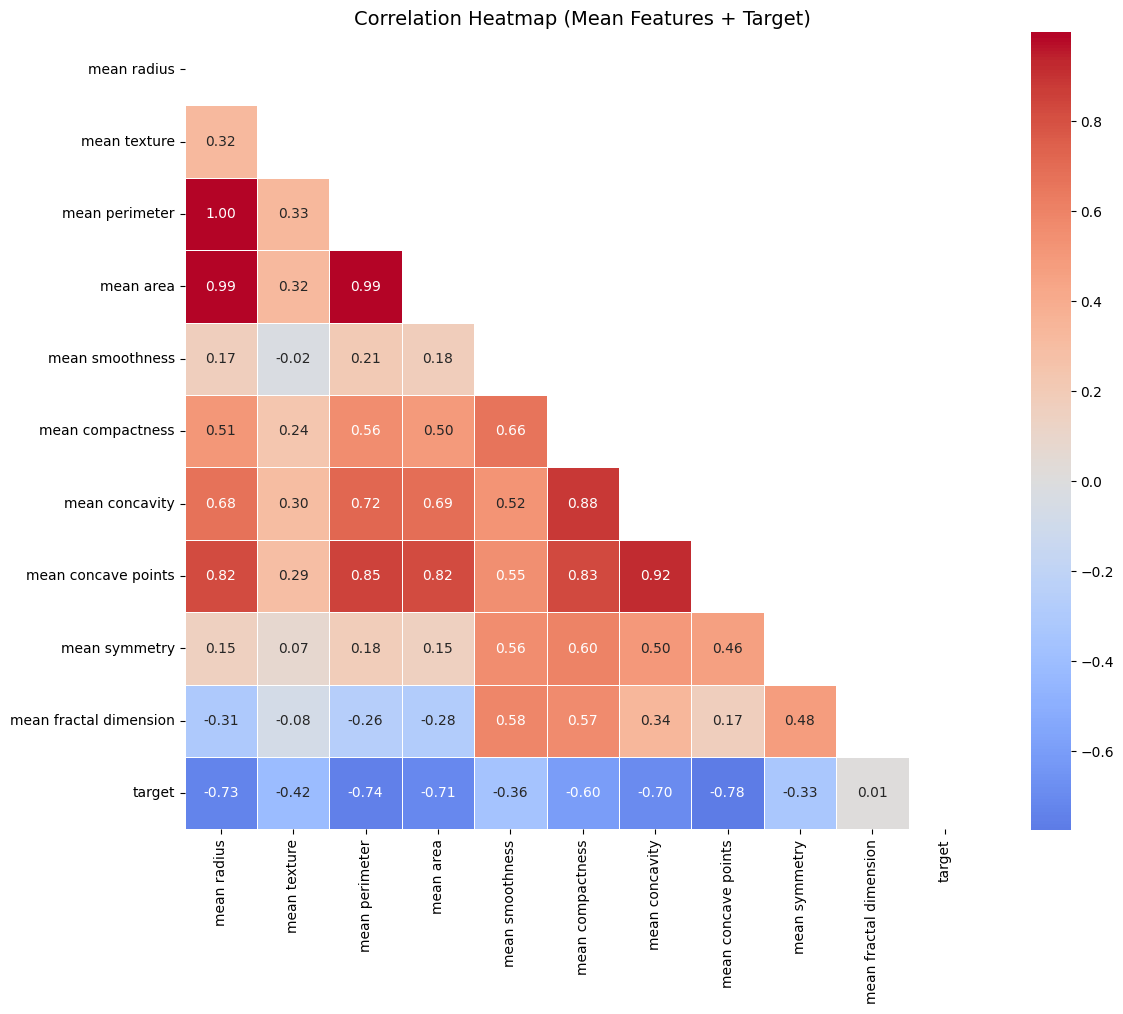


📊 Top Features Correlated with Target:
   mean concave points: 0.7766
   mean perimeter: 0.7426
   mean radius: 0.7300
   mean area: 0.7090
   mean concavity: 0.6964


In [7]:
# Correlation Heatmap (for mean features to keep it readable)
mean_feature_cols = [col for col in feature_names if 'mean' in col]
correlation_df = df[mean_feature_cols + ['target']]

plt.figure(figsize=(12, 10))
correlation_matrix = correlation_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Mean Features + Target)', fontsize=14)
plt.tight_layout()
plt.show()

# Top features correlated with target
print("\n📊 Top Features Correlated with Target:")
target_corr = correlation_matrix['target'].drop('target').abs().sort_values(ascending=False)
for feature, corr in target_corr.head(5).items():
    print(f"   {feature}: {corr:.4f}")

In [8]:
# Data Preprocessing - Train/Test Split and Scaling
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create scaled versions for models that need it (Logistic Regression, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set target distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest set target distribution:")
print(pd.Series(y_test).value_counts())

Training set size: 455
Test set size: 114

Training set target distribution:
1    285
0    170
Name: count, dtype: int64

Test set target distribution:
1    72
0    42
Name: count, dtype: int64


In [9]:
# Helper Function to Calculate All Evaluation Metrics
from sklearn.metrics import roc_auc_score, matthews_corrcoef

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate a model and return all required metrics.
    """
    # Predictions
    y_pred = model.predict(X_test)
    
    # For AUC, we need probability predictions
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Calculate all metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC Score': roc_auc_score(y_test, y_prob),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'MCC Score': matthews_corrcoef(y_test, y_pred)
    }
    
    # Print results
    print(f"\n{'='*60}")
    print(f"  {model_name} Results")
    print(f"{'='*60}")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"  {metric}: {value:.4f}")
    
    # Confusion Matrix
    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    return metrics

# Store results for comparison
all_results = []

## Model 1: Logistic Regression
Logistic Regression requires feature scaling for optimal performance.

In [10]:
# Model 1: Logistic Regression (uses scaled data)
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Evaluate the model
lr_results = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
all_results.append(lr_results)


  Logistic Regression Results
  Accuracy: 0.9825
  AUC Score: 0.9954
  Precision: 0.9861
  Recall: 0.9861
  F1 Score: 0.9861
  MCC Score: 0.9623

Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Model 2: Decision Tree Classifier
Decision Trees do not require feature scaling.

In [11]:
# Model 2: Decision Tree Classifier (no scaling needed)
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_results = evaluate_model(dt_model, X_test, y_test, "Decision Tree Classifier")
all_results.append(dt_results)


  Decision Tree Classifier Results
  Accuracy: 0.9123
  AUC Score: 0.9157
  Precision: 0.9559
  Recall: 0.9028
  F1 Score: 0.9286
  MCC Score: 0.8174

Confusion Matrix:
[[39  3]
 [ 7 65]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



## Model 3: K-Nearest Neighbors Classifier
KNN is a distance-based algorithm and requires feature scaling for optimal performance.

In [12]:
# Model 3: K-Nearest Neighbors Classifier (uses scaled data)
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model
knn_results = evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors")
all_results.append(knn_results)


  K-Nearest Neighbors Results
  Accuracy: 0.9561
  AUC Score: 0.9788
  Precision: 0.9589
  Recall: 0.9722
  F1 Score: 0.9655
  MCC Score: 0.9054

Confusion Matrix:
[[39  3]
 [ 2 70]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Model 4: Naive Bayes Classifier (Gaussian)
Gaussian Naive Bayes assumes features follow a normal distribution. It does not require scaling.

In [13]:
# Model 4: Gaussian Naive Bayes Classifier (no scaling needed)
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
nb_results = evaluate_model(nb_model, X_test, y_test, "Gaussian Naive Bayes")
all_results.append(nb_results)


  Gaussian Naive Bayes Results
  Accuracy: 0.9386
  AUC Score: 0.9878
  Precision: 0.9452
  Recall: 0.9583
  F1 Score: 0.9517
  MCC Score: 0.8676

Confusion Matrix:
[[38  4]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Model 5: Random Forest (Ensemble Model)
Random Forest is an ensemble of Decision Trees. It does not require feature scaling.

In [14]:
# Model 5: Random Forest Classifier (no scaling needed)
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_results = evaluate_model(rf_model, X_test, y_test, "Random Forest")
all_results.append(rf_results)


  Random Forest Results
  Accuracy: 0.9561
  AUC Score: 0.9937
  Precision: 0.9589
  Recall: 0.9722
  F1 Score: 0.9655
  MCC Score: 0.9054

Confusion Matrix:
[[39  3]
 [ 2 70]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Model 6: XGBoost (Ensemble Model)
XGBoost is a gradient boosting algorithm. It does not require feature scaling.

In [15]:
# Model 6: XGBoost Classifier (no scaling needed)
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_results = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
all_results.append(xgb_results)


  XGBoost Results
  Accuracy: 0.9561
  AUC Score: 0.9901
  Precision: 0.9467
  Recall: 0.9861
  F1 Score: 0.9660
  MCC Score: 0.9058

Confusion Matrix:
[[38  4]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Model Comparison
Compare all models based on the evaluation metrics.

In [16]:
# Create a comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.set_index('Model')

# Display the comparison table
print("="*80)
print("                    MODEL COMPARISON - ALL EVALUATION METRICS")
print("="*80)
display(results_df.round(4))

# Find the best model for each metric
print("\n" + "="*80)
print("                         BEST MODEL FOR EACH METRIC")
print("="*80)
for col in results_df.columns:
    best_model = results_df[col].idxmax()
    best_value = results_df[col].max()
    print(f"{col}: {best_model} ({best_value:.4f})")

                    MODEL COMPARISON - ALL EVALUATION METRICS


,Accuracy,AUC Score,Precision,Recall,F1 Score,MCC Score
Model,,,,,,
Logistic Regression,0.9825,0.9954,0.9861,0.9861,0.9861,0.9623
Decision Tree Classifier,0.9123,0.9157,0.9559,0.9028,0.9286,0.8174
K-Nearest Neighbors,0.9561,0.9788,0.9589,0.9722,0.9655,0.9054
Gaussian Naive Bayes,0.9386,0.9878,0.9452,0.9583,0.9517,0.8676
Random Forest,0.9561,0.9937,0.9589,0.9722,0.9655,0.9054
XGBoost,0.9561,0.9901,0.9467,0.9861,0.9660,0.9058



                         BEST MODEL FOR EACH METRIC
Accuracy: Logistic Regression (0.9825)
AUC Score: Logistic Regression (0.9954)
Precision: Logistic Regression (0.9861)
Recall: Logistic Regression (0.9861)
F1 Score: Logistic Regression (0.9861)
MCC Score: Logistic Regression (0.9623)


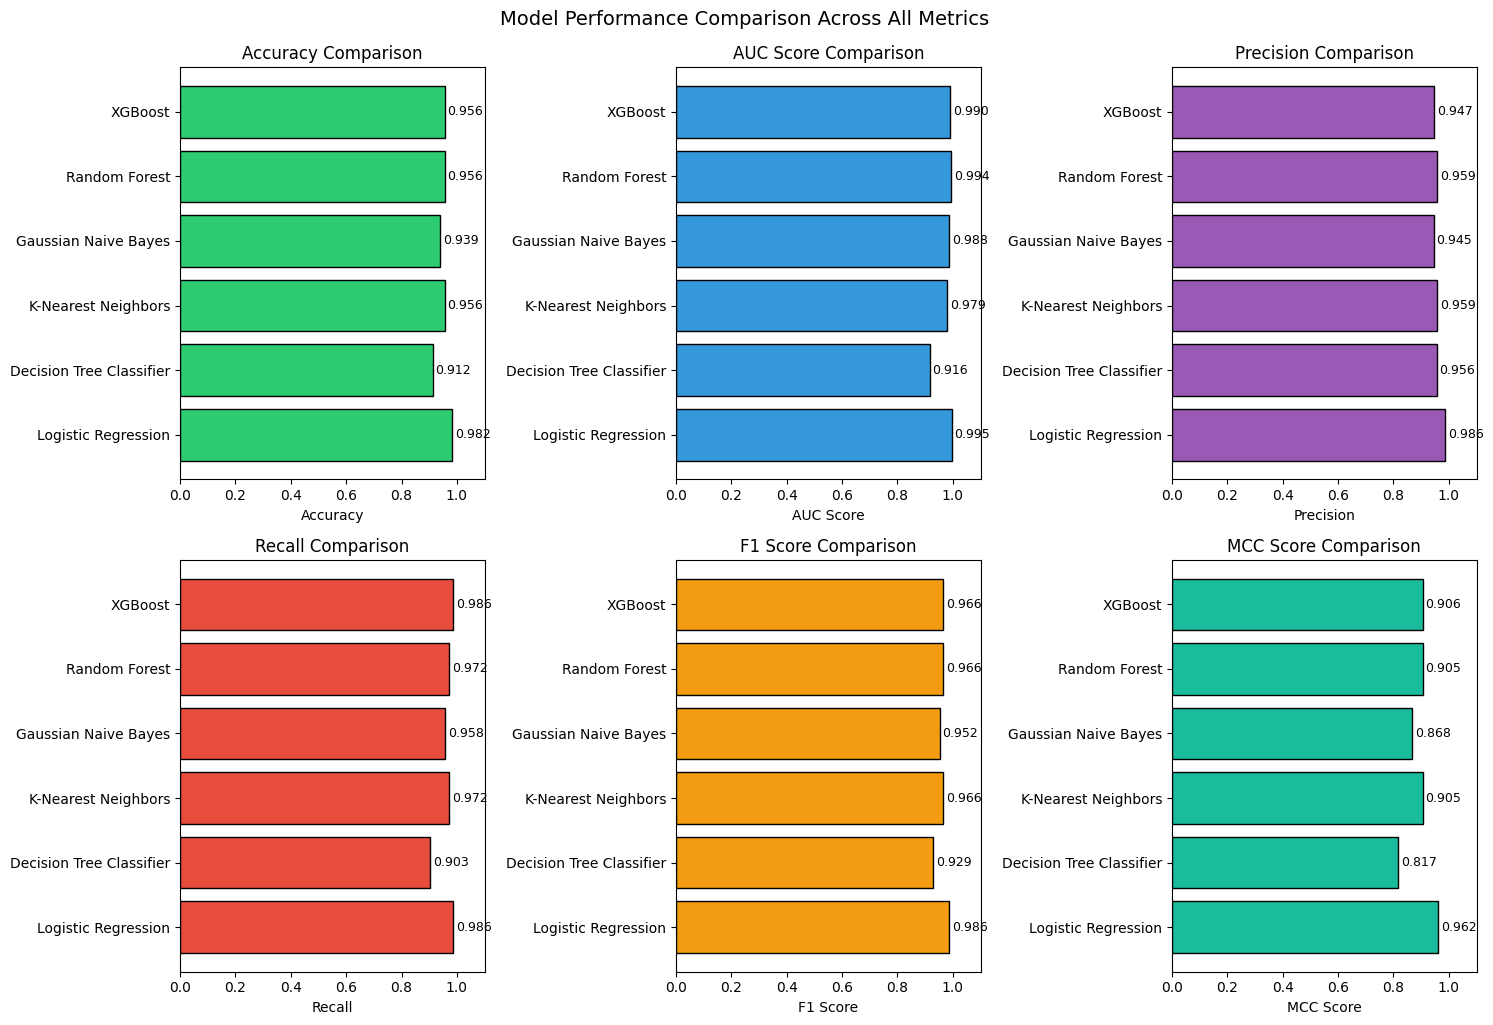

In [17]:
# Visualization: Model Comparison Bar Chart
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score']
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#1abc9c']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 3, idx % 3]
    bars = ax.barh(results_df.index, results_df[metric], color=color, edgecolor='black')
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlim(0, 1.1)
    
    # Add value labels on bars
    for bar, value in zip(bars, results_df[metric]):
        ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.suptitle('Model Performance Comparison Across All Metrics', fontsize=14, y=1.02)
plt.show()

## Save Models
Save all trained models to Google Drive for future use.

In [18]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Save all models as pickle files
import pickle
import os

# Define save directory
save_dir = '/content/drive/MyDrive/Colab Notebooks/ml_assignment_2/models/'

# Create directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Dictionary of all models
models = {
    'logistic_regression': lr_model,
    'decision_tree': dt_model,
    'knn': knn_model,
    'naive_bayes': nb_model,
    'random_forest': rf_model,
    'xgboost': xgb_model
}

# Save each model
print("Saving models to Google Drive...")
print("="*60)
for model_name, model in models.items():
    file_path = os.path.join(save_dir, f'{model_name}.pkl')
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved: {model_name}.pkl")

# Also save the scaler
scaler_path = os.path.join(save_dir, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Saved: scaler.pkl")

print("="*60)
print(f"\nAll models saved successfully to:\n{save_dir}")

Saving models to Google Drive...
Saved: logistic_regression.pkl
Saved: decision_tree.pkl
Saved: knn.pkl
Saved: naive_bayes.pkl
Saved: random_forest.pkl
Saved: xgboost.pkl
Saved: scaler.pkl

All models saved successfully to:
/content/drive/MyDrive/Colab Notebooks/ml_assignment_2/models/


In [22]:
# Save test data as CSV for use in Streamlit app
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/ml_assignment_2/data/'
os.makedirs(test_data_dir, exist_ok=True)

# Create test data DataFrame
test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['target'] = y_test

# Save to CSV
test_csv_path = os.path.join(test_data_dir, 'test_data.csv')
test_df.to_csv(test_csv_path, index=False)

print("\n" + "="*60)
print("SAVING TEST DATA")
print("="*60)
print(f"Saved test data: test_data.csv")
print(f"   Shape: {test_df.shape}")
print(f"   Location: {test_data_dir}")
print("="*60)


SAVING TEST DATA
Saved test data: test_data.csv
   Shape: (114, 31)
   Location: /content/drive/MyDrive/Colab Notebooks/ml_assignment_2/data/
